# 互评作业1: 数据探索性分析与数据预处理

选取的数据集：
1. [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews)
2. [Trending YouTube Video Statistics](https://www.kaggle.com/datasnaek/youtube-new)

> 导入数据集

In [42]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import operator

# Wine Reviews
wine_1 = pd.read_csv('./wine-reviews/winemag-data-130k-v2.csv', index_col = 0)
wine_2 = pd.read_csv('./wine-reviews/winemag-data_first150k.csv', index_col = 0)
wine_data = pd.concat([wine_1, wine_2], ignore_index=True, verify_integrity=True, sort=False)

# Trending YouTube Video Statistics
ytb_01 = pd.read_csv('./youtube-new/CAvideos.csv', index_col = 0)
ytb_02 = pd.read_csv('./youtube-new/DEvideos.csv', index_col = 0)
ytb_03 = pd.read_csv('./youtube-new/FRvideos.csv', index_col = 0)
ytb_04 = pd.read_csv('./youtube-new/GBvideos.csv', index_col = 0)
ytb_05 = pd.read_csv('./youtube-new/INvideos.csv', index_col = 0)
ytb_06 = pd.read_csv('./youtube-new/JPvideos.csv', index_col = 0, engine = 'python')
ytb_07 = pd.read_csv('./youtube-new/KRvideos.csv', index_col = 0, engine = 'python')
ytb_08 = pd.read_csv('./youtube-new/MXvideos.csv', index_col = 0, engine = 'python')
ytb_09 = pd.read_csv('./youtube-new/RUvideos.csv', index_col = 0, engine = 'python')
ytb_10 = pd.read_csv('./youtube-new/USvideos.csv', index_col = 0)
ytb_data = pd.concat([ytb_01, ytb_02, ytb_03, ytb_04, ytb_05, ytb_06, ytb_07, ytb_08, ytb_09, ytb_10], ignore_index=True, verify_integrity=True, sort=False)



## 1. 数据可视化和摘要
### 1.1 数据摘要

In [43]:
# 频数
def freq(data):
    res = dict()
    for i in data:
        if i in res:
            res[i] += 1
        else:
            res[i] = 1
    return res
        
## 1. Wine Reviews 的相关频数
# 1.1 country
country = {k: v for k, v in sorted(freq(wine_data.country).items(), key=lambda item: item[1], reverse=True)}
pairs = {k: country[k] for k in list(country)[:20]}
print("country 的频数统计展示\ncountry:\t frequency")
for c, f in pairs.items():
    print("%s:\t %i" % (c, f))
    
# 1.2 province
province = {k: v for k, v in sorted(freq(wine_data.province).items(), key=lambda item: item[1], reverse = True)}
pairs = {k: province[k] for k in list(province)[:20]}
print("\n\nprovince 的频数统计展示\nprovince:\t\t frequency")
for p, f in pairs.items():
    print("%s:\t\t %i" % (p, f))

country 的频数统计展示
country:	 frequency
US:	 116901
France:	 43191
Italy:	 43018
Spain:	 14913
Portugal:	 11013
Chile:	 10288
Argentina:	 9431
Australia:	 7286
Austria:	 6402
New Zealand:	 4739
Germany:	 4617
South Africa:	 3659
Greece:	 1350
Israel:	 1135
Canada:	 453
Hungary:	 377
Romania:	 259
Bulgaria:	 218
Uruguay:	 201
Slovenia:	 181


province 的频数统计展示
province:		 frequency
California:		 80755
Washington:		 18389
Tuscany:		 13178
Bordeaux:		 12052
Oregon:		 9962
Northern Spain:		 8743
Burgundy:		 8288
Mendoza Province:		 8006
Piedmont:		 7822
Veneto:		 6678
New York:		 5116
South Australia:		 4353
Sicily & Sardinia:		 4342
Alsace:		 4120
Northeastern Italy:		 4120
Loire Valley:		 3642
Southwest France:		 3104
Champagne:		 2983
Southern Italy:		 2788
Central Italy:		 2763


In [44]:
## 2. Trending YouTube Video Statistics 的相关频数
# 2.1 channel_title
channel_title = {k: v for k, v in sorted(freq(ytb_data.channel_title).items(),key=lambda item: item[1], reverse=True)}
pairs = {k: channel_title[k] for k in list(channel_title)[:20]}
print("\n\nchannel_title 的频数统计展示\nchannel_title:\t\t\t\t frequency")
for c, f in pairs.items():
    print("%s:\t\t\t\t %i" % (c, f))
    
# 2.2 tags
tags = {k: v for k, v in sorted(freq(ytb_data.tags).items(),key=lambda item: item[1], reverse=True)}
pairs = {k: tags[k] for k in list(tags)[:20]}
print("\n\ntags 的频数统计展示\ntags:\t\t\t\t frequency")
for c, f in pairs.items():
    print("%s:\t\t\t\t %i" % (c, f))



channel_title 的频数统计展示
channel_title:				 frequency
The Late Show with Stephen Colbert:				 984
WWE:				 804
Late Night with Seth Meyers:				 773
VikatanTV:				 763
TheEllenShow:				 743
Jimmy Kimmel Live:				 707
The Tonight Show Starring Jimmy Fallon:				 705
PewDiePie:				 652
RadaanMedia:				 651
The Late Late Show with James Corden:				 583
CNN:				 579
Netflix:				 566
FBE:				 555
MLG Highlights:				 549
SET India:				 528
Screen Junkies:				 494
ESPN:				 486
Marvel Entertainment:				 482
BuzzFeedVideo:				 481
Warner Bros. Pictures:				 470


tags 的频数统计展示
tags:				 frequency
[none]:				 37698
шарий|"шарий блог"|"новое видео шарий"|"шарий новое"|"анатолий шарий"|"шарий анатолий"|"ifhbq"|"видео шария"|"толя шарий":				 353
The Late Show|"Stephen Colbert"|"Colbert"|"Late Show"|"celebrities"|"late night"|"talk show"|"skits"|"bit"|"monologue"|"The Late Late Show"|"Late Late Show"|"letterman"|"david letterman"|"comedian"|"impressions"|"CBS"|"joke"|"jokes"|"funny"|"funny video"|"fun

In [48]:
# 5 数概括
def nums(nums):
    # 排序
    sorted_nums = sorted(nums)
    # 平均数
    mean = np.mean(sorted_nums)
    # 最小值
    minimum = sorted_nums[0]
    # 最大值
    maximum = sorted_nums[-1]
    # 分位数
    q1, median, q3 = np.percentile(sorted_nums, [25, 50, 75])
    # 中位数
    median = np.median(sorted_nums)
    # 众数
    mode = stats.mode(sorted_nums)[0][0]
    variance = np.var(sorted_nums)
    return len(nums), minimum, maximum, mean, variance, mode, median, q1, q3

## 1. Wine Reviews 的相关概括
# 1.1 points
n11, n12, n13, n14, n15, n16, n17, n18, n19 = nums(np.array(wine_data.points.dropna()))
print("points 五数概括")
print('最小值：\t%g' % n12)
print('q1：\t%g' % n18)
print('中位数：\t%g' % n17)
print('q3：\t%g' % n19)
print('最大值：\t%g' % n13)
print("points 缺失值个数：%g" % wine_data.points.isna().sum())

# 1.2 price
n21, n22, n23, n24, n25, n26, n27, n28, n29 = nums(np.array(wine_data.price.dropna()))
print("\n\nprice 五数概括")
print('最小值：\t%g' % n22)
print('q1：\t%g' % n28)
print('中位数：\t%g' % n27)
print('q3：\t%g' % n29)
print('最大值：\t%g' % n23)
print("price 缺失值个数：%g" % wine_data.price.isna().sum())

points 五数概括
最小值：	80
q1：	86
中位数：	88
q3：	90
最大值：	100
points 缺失值个数：0


price 五数概括
最小值：	4
q1：	16
中位数：	25
q3：	40
最大值：	3300
price 缺失值个数：22691


In [52]:
## 2. Trending YouTube Video Statistics 的相关概括
# 2.1 views
n31, n32, n33, n34, n35, n36, n37, n38, n39 = nums(np.array(ytb_data.views.dropna()))
print("views 五数概括")
print('最小值：\t%g' % n32)
print('q1：\t%g' % n38)
print('中位数：\t%g' % n37)
print('q3：\t%g' % n39)
print('最大值：\t%g' % n33)
print("views 缺失值个数：%g" % ytb_data.views.isna().sum())

# 2.2 dislikes
n41, n42, n43, n44, n45, n46, n47, n48, n49 = nums(np.array(ytb_data.dislikes.dropna()))
print("\n\ndislikes 五数概括")
print('最小值：\t%g' % n42)
print('q1：\t%g' % n48)
print('中位数：\t%g' % n47)
print('q3：\t%g' % n49)
print('最大值：\t%g' % n43)
print("dislikes 缺失值个数：%g" % ytb_data.dislikes.isna().sum())

views 五数概括
最小值：	117
q1：	46978
中位数：	177370
q3：	647679
最大值：	4.24539e+08
views 缺失值个数：0


dislikes 五数概括
最小值：	0
q1：	41
中位数：	179
q3：	749
最大值：	1.94497e+06
dislikes 缺失值个数：0


### 1.2 数据可视化

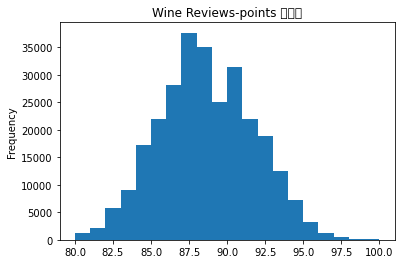

In [55]:
## 1. Wine Reviews 的相关数据可视化

# 1.1 直方图
# 1.1.1 points
wine_data.points.dropna().plot.hist(bins = 20, title = 'Wine Reviews-points 直方图')

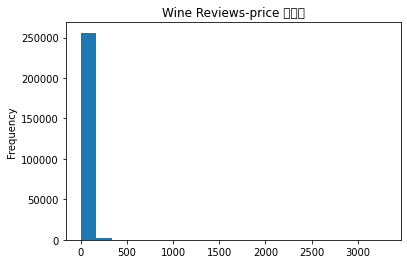

In [56]:
# 1.1.2 price
wine_data.price.dropna().plot.hist(bins = 20, title = 'Wine Reviews-price 直方图')

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30418 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0, flags=flags)


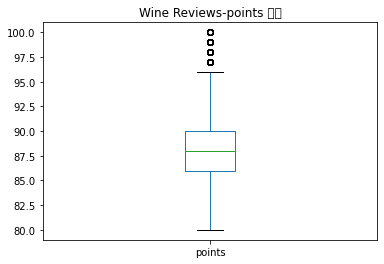

In [59]:
# 1.2 盒图
# 1.2.1 points
wine_data.points.dropna().plot.box(title = 'Wine Reviews-points 盒图')

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30418 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0, flags=flags)


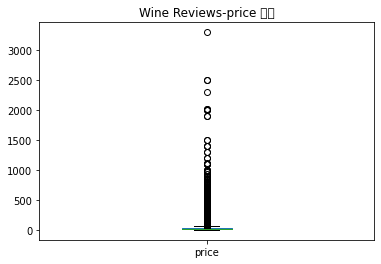

In [60]:
# 1.2.2 price
wine_data.price.dropna().plot.box(title = 'Wine Reviews-price 盒图')

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0, flags=flags)


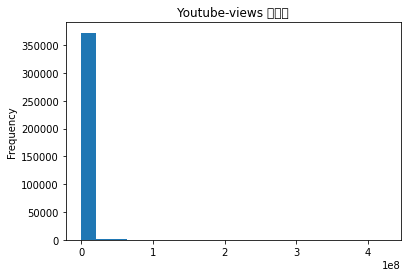

In [61]:
## 2. Trending YouTube Video Statistics 的相关数据可视化

# 2.1 直方图
# 2.1.1 views
ytb_data.views.dropna().plot.hist(bins = 20, title = 'Youtube-views 直方图')

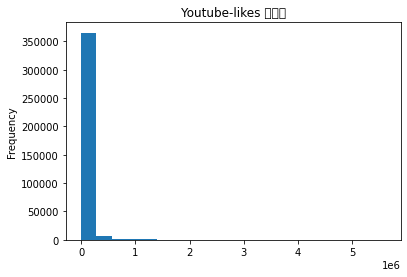

In [62]:
# 2.1.2 likes
ytb_data.likes.dropna().plot.hist(bins = 20, title = 'Youtube-likes 直方图')

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30418 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0, flags=flags)


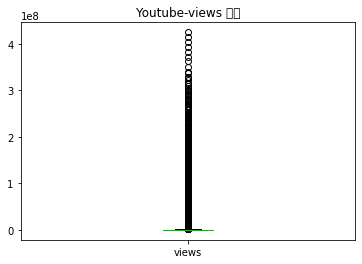

In [63]:
# 2.2 盒图
# 2.2.1 views
ytb_data.views.dropna().plot.box(title = 'Youtube-views 盒图')

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30418 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0, flags=flags)


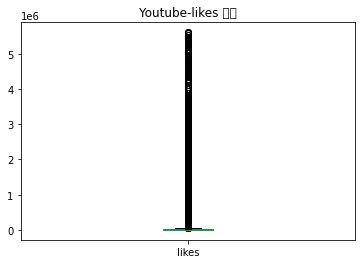

In [64]:
# 2.2.1 likes
ytb_data.likes.dropna().plot.box(title = 'Youtube-likes 盒图')

## 2. 数据缺失处理
### 2.1 填充值计算

In [67]:
# 1. Wine Reviews 相关计算
price_mode = stats.mode(wine_data.price.dropna())
points_mode = stats.mode(wine_data.points.dropna())
print('price 众数个数：%i，值为 %g。' % (len(price_mode[0]), n26))
print('points 众数个数：%i，值为 %g。' % (len(points_mode[0]), n16))

price 众数个数：1，值为 20。
points 众数个数：1，值为 87。


In [69]:
# 相似性计算
def similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    vec_1_norm = np.linalg.norm(v1)
    vec_2_norm = np.linalg.norm(v2)
    return dot_product / (vec_1_norm * vec_2_norm)

cosine_price = similarity(wine_data[['points', 'price']].dropna().points, wine_data[['points', 'price']].dropna().price)
pearson_price = wine_data[['points', 'price']].dropna().corr().points.price
print('points 与 price 的余弦相似度：%g。' % cosine_price)
print('points 与 price 的 Pearson 相关系数：%g。' % pearson_price)

points 与 price 的余弦相似度：0.674102。
points 与 price 的 Pearson 相关系数：0.437456。


In [71]:
## 2. Trending YouTube Video Statistics 相关计算
views_mode = stats.mode(ytb_data.views.dropna())
dislikes_mode = stats.mode(ytb_data.dislikes.dropna())
print('views 众数个数：%i，值为 %g。' % (len(views_mode[0]), n36))
print('likes 众数个数：%i，值为 %g。' % (len(dislikes_mode[0]), n46))

# 相似性计算
cosine_price = similarity(ytb_data[['views', 'dislikes']].dropna().views, ytb_data[['views', 'dislikes']].dropna().dislikes)
pearson_price = ytb_data[['views', 'dislikes']].dropna().corr().views.dislikes
print('views 与 dislikes 的余弦相似度：%g。' % cosine_price)
print('views 与 dislikes 的 Pearson 相关系数：%g。' % pearson_price)

views 众数个数：1，值为 3680。
likes 众数个数：1，值为 0。
views 与 dislikes 的余弦相似度：0.42993。
views 与 dislikes 的 Pearson 相关系数：0.421653。
